In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.linear_model import LinearRegression

In [2]:
def upload_files(filename):
    """
    Upload file to colab runtime
    """
    print(f"uploading....{filename}....")
    files.upload()

    if not os.path.isfile(filename):
        print(f"{filename} does not exist. Please upload mannually...")
        exit()


In [3]:
# 15% 20% 20% 15%
100*(1 + .15) * 1.2 * 1.2 * 1.15

190.43999999999994

In [4]:
# 60% -40% 120% -10%
100 * 1.6 * 0.6 * 2.2 *0.9

190.08

In [5]:
df = pd.DataFrame({'A': [1.15, 1.2, 1.2, 1.15], 'B': [1.6, 0.6, 2.2, 0.9]})

In [6]:
df

,A,B
0,1.15,1.6
1,1.20,0.6
2,1.20,2.2
3,1.15,0.9


In [7]:
df.std() * 4 ** 0.5

A    0.057735
B    1.436431
dtype: float64

### Log returns

In [8]:
1.15 * 1.2

1.38

In [9]:
1.15 + 1.2

2.3499999999999996

In [10]:
np.log(1.15), np.log(1.2)

(0.13976194237515863, 0.1823215567939546)

In [11]:
np.log(1.15) + np.log(1.2)

0.3220834991691132

In [12]:
np.log(1.15 * 1.2)

0.3220834991691132

### Volatility

In [13]:
ticker = "FB"
fname = f"ticker-{ticker.lower()}.csv"
upload_files(fname)

uploading....ticker-fb.csv....


Saving ticker-fb.csv to ticker-fb.csv


In [14]:
data = pd.read_csv(fname, index_col=0, parse_dates=True)

In [15]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999


In [16]:
data['Log Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift())

In [17]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,Log Returns
Date,,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998,NaN
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998,0.017756
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002,-0.001843
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006,0.013579
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999,0.007624


In [18]:
data['Volatility'] = data['Log Returns'].rolling(252).std() * (252 **0.5)

In [19]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,Log Returns,Volatility
Date,,,,,,,,
2020-12-24,270.399994,266.200012,268.880005,267.399994,6702000,267.399994,-0.002652,0.460331
2020-12-28,277.299988,265.660004,268.739990,277.000000,23299700,277.000000,0.035272,0.461605
2020-12-29,280.510010,276.279999,276.950012,276.779999,16383000,276.779999,-0.000795,0.461214
2020-12-30,278.079987,271.709991,277.950012,271.869995,11803800,271.869995,-0.017899,0.461600
2020-12-31,277.089996,269.809998,272.000000,273.160004,12892900,273.160004,0.004734,0.461146


In [20]:
current_volatility = data['Volatility'].iloc[-1]

In [21]:
current_volatility

0.4611456880817148

In [22]:
str_vol = str(round(current_volatility, 3)*100)

In [23]:
str_vol

'46.1'

Text(0.5, 1.0, 'Historic Volatility for ticker(46.1%)')

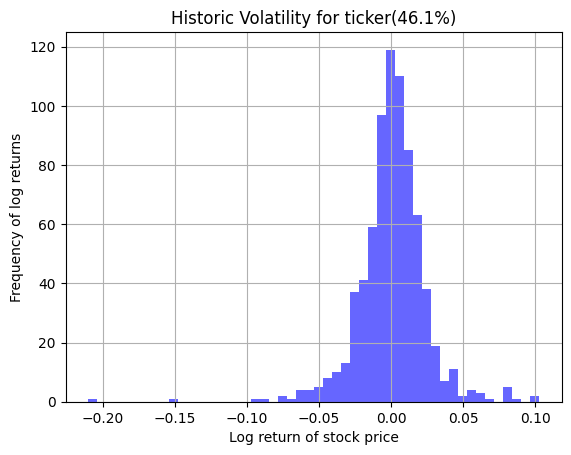

In [24]:
fig, ax = plt.subplots()
data['Log Returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log return of stock price")
ax.set_ylabel("Frequency of log returns")
ax.set_title("Historic Volatility for " + "ticker" + "(" + str_vol + "%)")

### Correlations

In [25]:
tickers = ['FB', 'AMZN', 'AAPL', 'HP', 'NVDA']
df_list = []
for ticker in tickers:
    fname = f"ticker-{ticker.lower()}.csv"
    upload_files(fname)
    df = pd.read_csv(fname, index_col=0, parse_dates=True)
    print(df.head())
    df_list.append(df['Adj Close'])

data = pd.concat(df_list, axis=1)

uploading....ticker-fb.csv....


                  High         Low        Open       Close    Volume  \
Date                                                                   
2018-01-02  181.580002  177.550003  177.679993  181.419998  18151900   
2018-01-03  184.779999  181.330002  181.880005  184.669998  16886600   
2018-01-04  186.210007  184.100006  184.899994  184.330002  13880900   
2018-01-05  186.899994  184.929993  185.589996  186.850006  13574500   
2018-01-08  188.899994  186.330002  187.199997  188.279999  17994700   

             Adj Close  
Date                    
2018-01-02  181.419998  
2018-01-03  184.669998  
2018-01-04  184.330002  
2018-01-05  186.850006  
2018-01-08  188.279999  
uploading....ticker-amzn.csv....


Saving ticker-amzn.csv to ticker-amzn.csv
                   High          Low         Open        Close   Volume  \
Date                                                                      
2018-01-02  1190.000000  1170.510010  1172.000000  1189.010010  2694500   
2018-01-03  1205.489990  1188.300049  1188.300049  1204.199951  3108800   
2018-01-04  1215.869995  1204.660034  1205.000000  1209.589966  3022100   
2018-01-05  1229.140015  1210.000000  1217.510010  1229.140015  3544700   
2018-01-08  1253.079956  1232.030029  1236.000000  1246.869995  4279500   

              Adj Close  
Date                     
2018-01-02  1189.010010  
2018-01-03  1204.199951  
2018-01-04  1209.589966  
2018-01-05  1229.140015  
2018-01-08  1246.869995  
uploading....ticker-aapl.csv....


Saving ticker-aapl.csv to ticker-aapl.csv
                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2018-01-02  43.075001  42.314999  42.540001  43.064999  102223600.0  41.442081
2018-01-03  43.637501  42.990002  43.132500  43.057499  118071600.0  41.434864
2018-01-04  43.367500  43.020000  43.134998  43.257500   89738400.0  41.627323
2018-01-05  43.842499  43.262501  43.360001  43.750000   94640000.0  42.101261
2018-01-08  43.902500  43.482498  43.587502  43.587502   82271200.0  41.944889
uploading....ticker-hp.csv....


Saving ticker-hp.csv to ticker-hp.csv
            Adj Close      Close       High        Low       Open     Volume
Date                                                                        
2020-01-02  41.416153  45.270000  45.880001  44.360001  45.860001  1852400.0
2020-01-03  41.946781  45.849998  46.689999  45.080002  46.250000  1293400.0
2020-01-06  43.136116  47.150002  47.330002  45.990002  46.200001  2035100.0
2020-01-07  42.578041  46.540001  46.880001  45.529999  46.880001  1110800.0
2020-01-08  41.699768  45.580002  46.490002  44.790001  46.189999  1944700.0
uploading....ticker-nvda.csv....


Saving ticker-nvda.csv to ticker-nvda.csv
             Adj Close       Close        High         Low        Open  \
Date                                                                     
2020-01-02  239.514771  239.910004  239.910004  236.720001  238.750000   
2020-01-03  235.681122  236.070007  237.830002  234.100006  235.100006   
2020-01-06  236.669479  237.059998  237.270004  231.270004  232.320007   
2020-01-07  239.534729  239.929993  241.770004  236.389999  238.199997   
2020-01-08  239.984009  240.380005  242.039993  238.149994  239.759995   

               Volume  
Date                   
2020-01-02  5938400.0  
2020-01-03  5134600.0  
2020-01-06  6565900.0  
2020-01-07  7871400.0  
2020-01-08  6927700.0  


In [26]:
data.head()

,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,
2018-01-02,181.419998,1189.010010,41.442081,NaN,NaN
2018-01-03,184.669998,1204.199951,41.434864,NaN,NaN
2018-01-04,184.330002,1209.589966,41.627323,NaN,NaN
2018-01-05,186.850006,1229.140015,42.101261,NaN,NaN
2018-01-08,188.279999,1246.869995,41.944889,NaN,NaN


In [27]:
data.columns = tickers

In [28]:
data.head()

,FB,AMZN,AAPL,HP,NVDA
Date,,,,,
2018-01-02,181.419998,1189.010010,41.442081,NaN,NaN
2018-01-03,184.669998,1204.199951,41.434864,NaN,NaN
2018-01-04,184.330002,1209.589966,41.627323,NaN,NaN
2018-01-05,186.850006,1229.140015,42.101261,NaN,NaN
2018-01-08,188.279999,1246.869995,41.944889,NaN,NaN


In [29]:
data = np.log(data/data.shift())

In [30]:
data.head()

,FB,AMZN,AAPL,HP,NVDA
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.017756,0.012694,-0.000174,NaN,NaN
2018-01-04,-0.001843,0.004466,0.004634,NaN,NaN
2018-01-05,0.013579,0.016033,0.011321,NaN,NaN
2018-01-08,0.007624,0.014322,-0.003721,NaN,NaN


In [31]:
data.corr()

,FB,AMZN,AAPL,HP,NVDA
FB,1.000000,0.631197,0.618762,0.368096,0.706674
AMZN,0.631197,1.000000,0.657111,0.278016,0.673209
AAPL,0.618762,0.657111,1.000000,0.426661,0.782293
HP,0.368096,0.278016,0.426661,1.000000,0.451561
NVDA,0.706674,0.673209,0.782293,0.451561,1.000000


In [32]:
data.corr().style.background_gradient(cmap='Blues')

,FB,AMZN,AAPL,HP,NVDA
FB,1.000000,0.631197,0.618762,0.368096,0.706674
AMZN,0.631197,1.000000,0.657111,0.278016,0.673209
AAPL,0.618762,0.657111,1.000000,0.426661,0.782293
HP,0.368096,0.278016,0.426661,1.000000,0.451561
NVDA,0.706674,0.673209,0.782293,0.451561,1.000000


### Linear Regression

In [33]:
X = np.random.randn(5000)
Y = np.random.randn(5000)

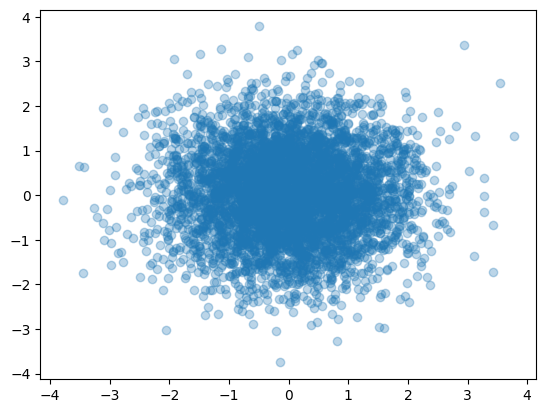

In [34]:
fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=0.3);

In [35]:
data = pd.concat(df_list, axis=1)
data.columns = tickers

In [40]:
data = np.log((data / data.shift()))

In [47]:
data = data.fillna(data.mean())

In [48]:
def lin_regr(ticker_a, ticker_b):
    X = data[ticker_a].iloc[1:].values.reshape(-1, 1)
    Y = data[ticker_b].iloc[1:].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, Y)
    Y_preds = model.predict(X)

    alpha = str(round(model.intercept_[0], 5))
    beta = str(round(model.coef_[0][0], 5))

    fig, ax = plt.subplots()
    ax.set_title(f"Alpha: {alpha}, Beta: {beta}")
    ax.scatter(X, Y, alpha=0.3)
    ax.plot(X, Y_preds, c='r', )


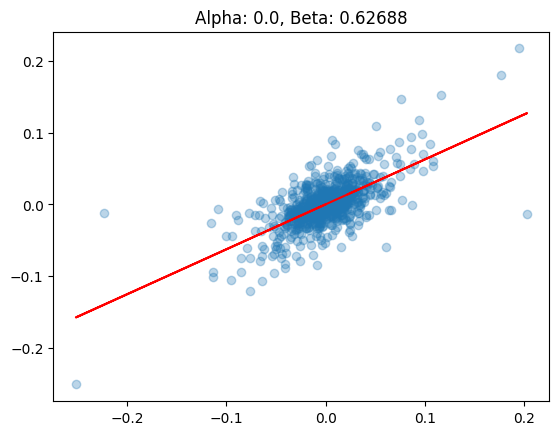

In [49]:
lin_regr('FB', 'AAPL')

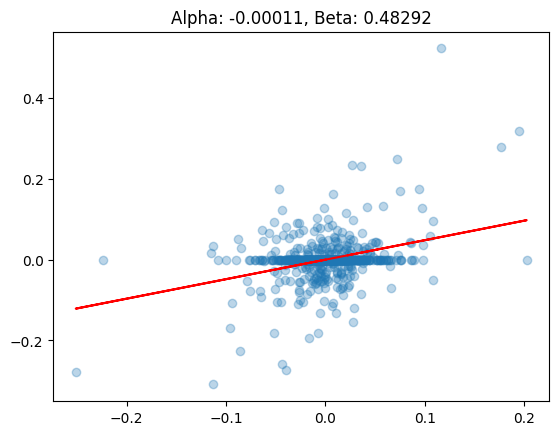

In [50]:
lin_regr('FB', 'HP')

In [52]:
def calc_beta(ticker_a, ticker_b):
    X = data[ticker_a].iloc[1:].values.reshape(-1, 1)
    Y = data[ticker_b].iloc[1:].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, Y)
    Y_preds = model.predict(X)

    return model.coef_[0][0]

In [53]:
calc_beta("FB", "HP")

0.4829168151692137

In [54]:
import itertools

df = pd.DataFrame(None, index=tickers, columns=tickers)
for t1, t2 in itertools.combinations(tickers, 2):
    df.loc[t1][t2] = calc_beta(t1, t2)
    df.loc[t2][t1] = calc_beta(t2, t1)


for t in tickers:
    df.loc[t][t] = calc_beta(t, t)

In [55]:
df

,FB,AMZN,AAPL,HP,NVDA
FB,1.0,0.577509,0.626881,0.482917,0.510181
AMZN,0.798268,1.0,0.773286,0.465588,0.538526
AAPL,0.718868,0.641525,1.0,0.667712,0.670355
HP,0.243287,0.169691,0.29334,1.0,0.369628
NVDA,0.570643,0.43577,0.653855,0.820651,1.0


### Beta

* Beta = Coveriance / Variance

In [57]:
upload_files("sp500-m.csv")
upload_files("aapl-m.csv")

uploading....sp500-m.csv....


uploading....aapl-m.csv....


Saving aapl-m.csv to aapl-m.csv


In [58]:
sp500 = pd.read_csv("sp500-m.csv", index_col=0, parse_dates=True)
aapl = pd.read_csv("aapl-m.csv", index_col=0, parse_dates=True)

In [59]:
ticker = 'AAPL'
col = 'Adj Close'

data = pd.concat([sp500['Adj Close'], aapl['Adj Close']], axis=1)
data.columns = ['SP500', ticker]

In [60]:
data.head()

,SP500,AAPL
Date,,
2015-11-01,2080.409912,27.283606
2015-12-01,2043.939941,24.380093
2016-01-01,1940.239990,22.545681
2016-02-01,1932.229980,22.395130
2016-03-01,2059.739990,25.381014


In [61]:
data = np.log(data/ data.shift())

In [62]:
data.head()

,SP500,AAPL
Date,,
2015-11-01,NaN,NaN
2015-12-01,-0.017686,-0.112519
2016-01-01,-0.052068,-0.078223
2016-02-01,-0.004137,-0.006700
2016-03-01,0.063905,0.125158


In [69]:
cov = data.cov().iloc[0, 1]

In [70]:
cov

0.0024656309886439735

In [71]:
var = data['SP500'].var()

In [72]:
beta = cov / var

In [73]:
beta

1.2783253531221663

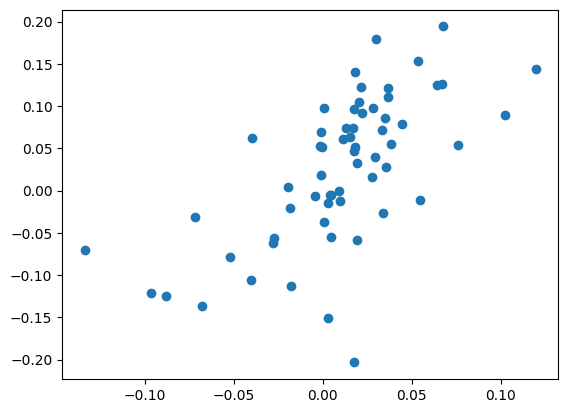

In [76]:
fig, ax = plt.subplots()
ax.scatter(data['SP500'], data['AAPL']);

In [77]:
X = data['SP500'].iloc[1:].values.reshape(-1, 1)
Y = data['AAPL'].iloc[1:].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, Y)
beta = model.coef_

In [78]:
beta

array([[1.27832535]])

### CAPM

* Capital Asset Pricing Model
* Theoritical representation of financial markets
* Financial analytical tool
* High complex extensions of the simple model


CAPM ERi = Ri + betai(ERm - Rf)
* ERi: Expected return from investment
* Rf: Risk free return
* betai: The beta of the investment
* (ERm - Rf): Market risk premium


Expected return increases as the risk increases

Risk free return: 10 Year Treasury Bonds

Efficient Market Hypothesis (EMH)

Asset prices reflect all available information

In [79]:
sp500 = pd.read_csv("sp500-m.csv", index_col=0, parse_dates=True)
data = pd.read_csv("aapl-m.csv", index_col=0, parse_dates=True)

col = 'Adj Close'
ticker = 'AAPL'
sp500['SP500'] = np.log(sp500[col] / sp500[col].shift())
data[ticker] = np.log(data[col] / data[col].shift())

In [80]:
df = pd.concat([sp500['SP500'], data[ticker]], axis=1)

In [82]:
coveriance = df.cov()
variance = df['SP500'].var()
beta = coveriance.iloc[0, 1] / variance

In [83]:
beta

1.2783253531221663

In [84]:
risk_free_return = 0.011
market_return = 0.105
expected_return = risk_free_return + beta * (market_return - risk_free_return)

In [85]:
expected_return

0.13116258319348365

In [86]:
beta * market_return

0.13422416207782745